# PHYS 6260: Homework 6, Michael Haynes

## Problem 1: Parallel Monte Carlo Solver
### The Nuclear Decay Equation
The $^8\mathrm{Li}$ isotope is unstable and has a half life $\tau_{1/2} = 838.73 \cdot 10^{-3} \,\mathrm{s}$. The $\beta^-$ decay of $^8\mathrm{Li}$ converts a neutron in the atom's nucleus to a proton and electron (with an anti-neutrino), yielding $^8\mathrm{Be}$. The decay rate of this isotope can be represented by a simple analytical form. For a $^8\mathrm{Li}$ population of number $N$, the conversion of one species to the other follows
$$ \frac{\mathrm{d}N}{\mathrm{d}t} = -\lambda N = -\frac{\log{(2)} N}{\tau_{1/2}} \qquad .$$
Direct integration yields
$$ N(t) = N_0 e^{-\lambda t} \qquad .$$  
We will model this process by using a function to randomly 

0.0037764058553686475


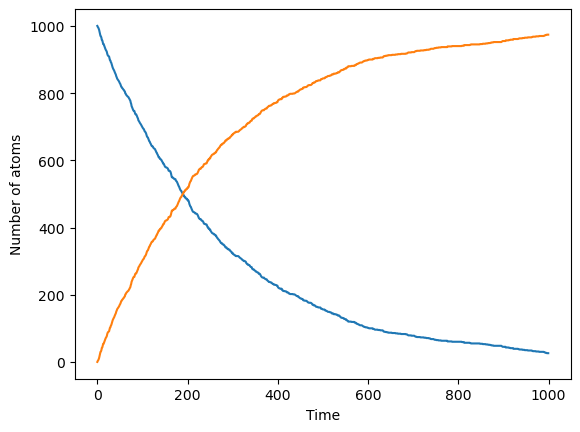

In [5]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 183.2           # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

print(p)
# Lists of plot points
tpoints = np.arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for n,t in enumerate(tpoints):
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Complete in-class
    # Calculate the number of atoms that decay in this timestep
    rand_arr = np.random.random(Tlpoints[n])
    new_s2 = (rand_arr < p).sum()
    NTl -= new_s2
    NPb += new_s2
    

    
# Make the graph
plt.plot(tpoints,Tlpoints)
plt.plot(tpoints,Pbpoints)
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.show()


0.0008269394298041632


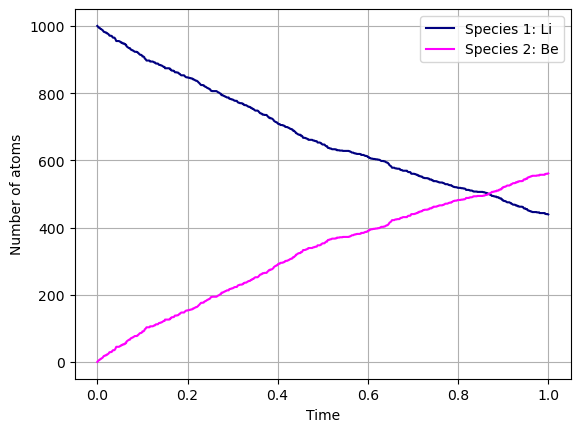

In [25]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

# Constants
Ns1 = 1000            # Number of species 1 atoms (the species undergoing decay, in this case, Li)
Ns2 = 0               # Number of species 2 atoms (the daughter isotope)
tau = 838.7e-03       # Half life of species 1 in seconds
tmax = 1              # Total time

tpoints = np.linspace(start=0.0,stop=tmax,num=1000)
h = tpoints[1] - tpoints[0]

# initialize probability of single transition
p = 1 - 2**(-h/tau)   # Probability of decay in one step

print(p)
# Lists of plot points
S1points = []
S2points = []

# Main loop
for n,t in enumerate(tpoints):
    S1points.append(Ns1)
    S2points.append(Ns2)

    # Complete in-class
    # Calculate the number of atoms that decay in this timestep
    rand_arr = np.random.random(S1points[n])
    new_s2 = (rand_arr < p).sum()

    Ns1 -= new_s2
    Ns2 += new_s2
    

    
# Make the graph
plt.plot(tpoints,S1points, color='navy',label='Species 1: Li')
plt.plot(tpoints,S2points, color='magenta', label='Species 2: Be')
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.grid()
plt.legend()

plt.show()


0.0008269394298041632


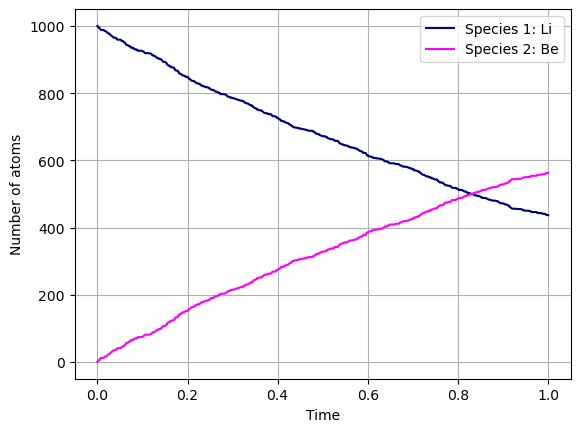

In [29]:
Ns1 = 1000            # Number of species 1 atoms (the species undergoing decay, in this case, Li)
Ns2 = 0               # Number of species 2 atoms (the daughter isotope)
tau = 838.7e-03       # Half life of species 1 in seconds
tmax = 1              # Total time
NUM = 1000

def NucDecay(Ns1,Ns2,tau,tmax,NUM,Seed):
    tpoints = np.linspace(start=0.0,stop=tmax,num=1000)
    h = tpoints[1] - tpoints[0]
    
    # initialize probability of single transition
    p = 1 - 2**(-h/tau)   # Probability of decay in one step
    
    print(p)
    # Lists of plot points
    S1points = []
    S2points = []
    
    # Main loop
    for n,t in enumerate(tpoints):
        S1points.append(Ns1)
        S2points.append(Ns2)

        # Calculate the number of decayed atoms in each timestep h
        rand_arr = np.random.random(S1points[n])
        new_s2 = (rand_arr < p).sum()
        
        Ns1 -= new_s2
        Ns2 += new_s2

    return tpoints,S1points,S2points

tpoints, S1points, S2points = NucDecay(Ns1,Ns2,tau,tmax,NUM,100)

    
# Simple plot routine
plt.plot(tpoints,S1points, color='navy',label='Species 1: Li')
plt.plot(tpoints,S2points, color='magenta', label='Species 2: Be')
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.grid()
plt.legend()

plt.show()


## Problem 2 (run and include as script)
See HW6-Nbody0.py for a serial version to parallelize.

In this notebook below, include your particle position plot at the final time and your parallel efficiency code and plot here.

## Problem 3